In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Salesstore.csv")
df.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [3]:
df.shape

(730, 13)

In [4]:
df.isnull().sum()

Order_ID                0
Order_Priority          0
Order_Quantity          0
Sales                   0
Ship_Mode               0
Profit                  0
Customer_Name           0
Region                  0
Customer_Segment        0
Product_Category        0
Product_Sub-Category    0
Product_Name            0
Product_Container       0
dtype: int64

In [5]:
df.tail()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
725,56101,Not Specified,44,5347.13,Regular Air,1886.41,Bill Donatelli,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,GBC Therma-A-Bind 250T Electric Binding System,Small Box
726,1059,Critical,22,127.33,Regular Air,5.30,Sean O'Donnell,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,Wilson Jones 14 Line Acrylic Coated Pressboard...,Small Box
727,1059,Critical,24,990.10,Regular Air,310.22,Sean O'Donnell,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",Small Box
728,1826,Not Specified,5,28.32,Regular Air,-14.35,Susan Vittorini,Ontario,Corporate,Office Supplies,Paper,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,Small Box
729,20003,Medium,39,796.08,Regular Air,30.29,Shirley Schmidt,Ontario,Corporate,Technology,Computer Peripherals,Belkin 105-Key Black Keyboard,Small Box


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_ID              730 non-null    int64  
 1   Order_Priority        730 non-null    object 
 2   Order_Quantity        730 non-null    int64  
 3   Sales                 730 non-null    float64
 4   Ship_Mode             730 non-null    object 
 5   Profit                730 non-null    float64
 6   Customer_Name         730 non-null    object 
 7   Region                730 non-null    object 
 8   Customer_Segment      730 non-null    object 
 9   Product_Category      730 non-null    object 
 10  Product_Sub-Category  730 non-null    object 
 11  Product_Name          730 non-null    object 
 12  Product_Container     730 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 74.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_ID,730.0,29721.597260,17350.560439,35.00,14479.000000,29350.500,44978.500,59909.00
Order_Quantity,730.0,24.857534,14.182970,1.00,13.000000,25.000,37.000,50.00
Sales,730.0,1502.777653,2893.936648,8.60,171.098375,438.700,1480.855,27663.92
Profit,730.0,207.479233,878.631028,-4437.91,-77.132500,0.035,180.000,8417.57


In [8]:
#  Droping columns:
df = df.drop(columns=["Product_Name",'Product_Sub-Category'])

In [9]:
df.columns

Index(['Order_ID', 'Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode',
       'Profit', 'Customer_Name', 'Region', 'Customer_Segment',
       'Product_Category', 'Product_Container'],
      dtype='object')

In [10]:
df.shape

(730, 11)

PerForming  EDA  

In [11]:
df['Order_Priority'].value_counts()

Order_Priority
Not Specified    156
High             152
Low              147
Critical         147
Medium           128
Name: count, dtype: int64

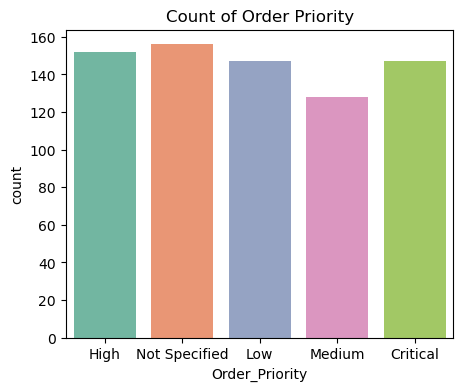

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x='Order_Priority',data = df, palette = "Set2")
plt.title('Count of Order Priority')
plt.show()

# Shipping Mode Analysis

In [13]:
df['Ship_Mode'].value_counts()

Ship_Mode
Regular Air    579
Express Air    151
Name: count, dtype: int64

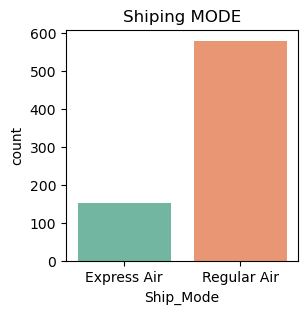

In [14]:
plt.figure(figsize=(3,3))
sns.countplot(x='Ship_Mode',data = df,palette = "Set2")
plt.title('Shiping MODE')
plt.show()

  Most Of the orders are going thru the Regular Air

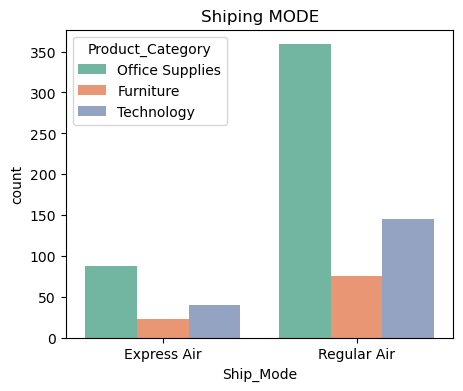

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(x='Ship_Mode',data = df, hue ="Product_Category", palette = "Set2")
plt.title('Shiping MODE')
plt.show()

Highest selling Products are Office Supllies.Store management should provide some offer to customers to increase sales rate of Fruniture and Technology.

# Region:

In [16]:
df['Region'].value_counts()

Region
West                     232
Atlantic                 170
Northwest Territories    150
Prarie                    79
Ontario                   67
Nunavut                   32
Name: count, dtype: int64

In [17]:
x = df['Region'].value_counts().index
y = df['Region'].value_counts().values

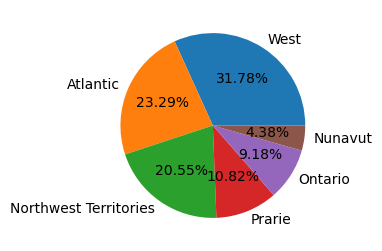

In [18]:
plt.figure(figsize=(5,3))
plt.pie(y,labels=x,autopct='%0.2f%%')
plt.show()

The customers from West region purchasing most of the products.

# Customer segment

In [19]:
x = df['Customer_Segment'].value_counts().index
y = df['Customer_Segment'].value_counts().values

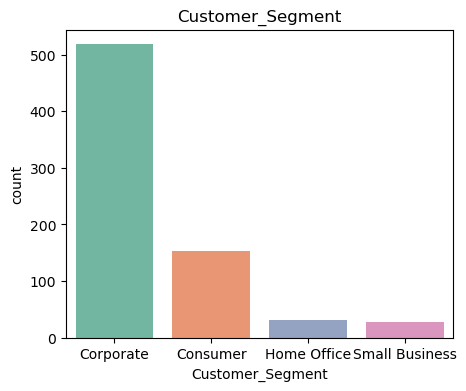

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(x='Customer_Segment',data = df,palette = "Set2")
plt.title('Customer_Segment')
plt.show()

Last Analysis is  showing the most of the customer are belongs to Corpotate Fie